# Capstone project: comparing two cities, Torino and Lausanne

# Dependencies

Here we import all the dependencies needed

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# for importing tables from the Wikipedia page
import pandas as pd
!pip install lxml

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


# Lausanne analysis

Here we get the coordinates of the city of Lausanne

In [2]:
address = 'Lausanne, Switzerland'

geolocator = Nominatim(user_agent="lau_explorer")
location = geolocator.geocode(address)
latitude_lau = location.latitude
longitude_lau = location.longitude
print('The geograpical coordinate of Lausanne are {}, {}.'.format(latitude_lau, longitude_lau))

The geograpical coordinate of Lausanne are 46.5218269, 6.6327025.


In [3]:
wiki_url = 'https://fr.wikipedia.org/wiki/Liste_des_quartiers_de_Lausanne'
wiki_table = pd.read_html(wiki_url)  

In [4]:
lau_data = pd.DataFrame(wiki_table[0])
lau_data

,no,nom,superficie (ha),nombre d'habitants (2014),secteurs : code - nom - (nombre d'habitants en 2014),situation sur la carte
0,1,Centre,1243,12 753,101 Rue Centrale (2 358) 102 Chauderon (2 148)...,NaN
1,2,Maupas/Valency,803,13 598,201 Maupas (2 758) 202 Av. d’Échallens (3 872)...,NaN
2,3,Sébeillon/Malley,1039,10 322,301 Rue de Morges (3 303) 302 Rue de Sébeillon...,NaN
3,4,Montoie/Bourdonnette,1742,7 573,401 Montoie (3 036) 402 Vallée de la Jeunesse ...,NaN
4,5,Montriond/Cour,1444,8 258,501 Marc-Dufour (2 924) 502 Milan (2) 503 Les ...,NaN
5,6,Sous-Gare/Ouchy,799,10 753,601 Grancy (3 905) 602 Harpe (4 164) 603 Av. d...,NaN
6,7,Montchoisi,524,3 589,701 Montchoisi (3 365) 702 Élysée (224),NaN
7,8,Florimont/Chissiez,466,5 555,801 Florimont (1 893) 802 Av. Rambert (1 126) ...,NaN
8,9,Mousquines/Bellevue,551,2 568,901 Mon-Repos (175) 902 Av. Secrétan (1 731) 9...,NaN
9,10,Vallon/Béthusy,892,6 315,1001 Le Vallon (1 382) 1002 Hôpitaux (274) 100...,NaN


In [5]:
from unicodedata import normalize
temp = pd.Series([],dtype = str)
for i in range(0, len(lau_data["nombre d'habitants (2014)"])):
    normalize('NFKD', lau_data["nombre d'habitants (2014)"][i])
    temp[i] = lau_data["nombre d'habitants (2014)"][i].replace(' ','').replace('\xa0','')

In [6]:
lau_data["nombre d'habitants (2014)"] = temp.astype(float)

To get an idea of the total population and the distribution per quarter, we plot the number of inhabitants per quarter of Lausanne

Text(0.5, 1.0, 'Number of inhabitants in the different quarters of the city of Lausanne')

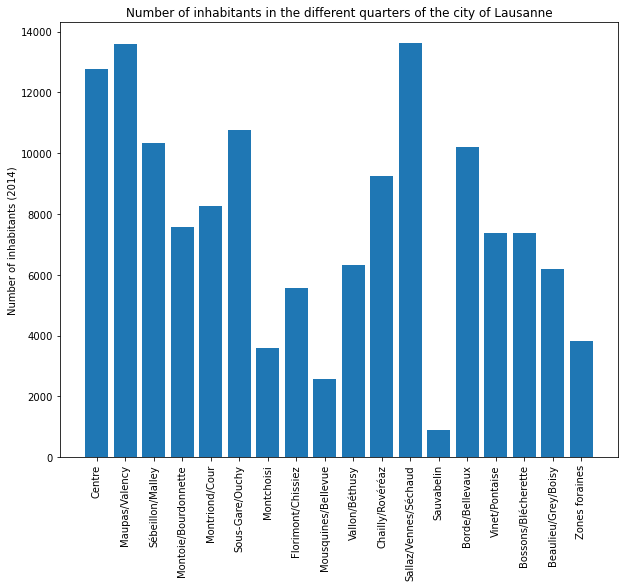

In [7]:
plt.figure(figsize = (10,8))
plt.bar(lau_data['nom'],lau_data["nombre d'habitants (2014)"])
plt.xticks(rotation = 90)
plt.ylabel('Number of inhabitants (2014)')
plt.title('Number of inhabitants in the different quarters of the city of Lausanne')

The total number of inhabitants in Lausanne is: 

In [8]:
tot_laus = lau_data["nombre d'habitants (2014)"].sum()
tot_laus

140023.0

In [9]:
cols = [0,2,3,4,5]

In [10]:
lau_data.drop(lau_data.columns[cols], axis = 1, inplace = True)

In [11]:
lau_data.rename(columns={'nom':'neighbourhoods'}, inplace = True)

In [12]:
lau_data.head()

,neighbourhoods
0,Centre
1,Maupas/Valency
2,Sébeillon/Malley
3,Montoie/Bourdonnette
4,Montriond/Cour


Unfortunately there is not a table listing already the coordinate of the center for each quarter, so the coordinates where added by hand

In [13]:
lau_data['latitude'] = [46.5189,46.5264,46.5236,46.5208,46.5155,46.5069,46.5094,46.5142,46.5186,46.5242,46.5267,46.5378,46.5378,46.5367,46.5269,46.5472,46.5331,46.5622]
lau_data['longitude'] = [6.6358,6.6211,6.6189,6.5958,6.6156,6.6267,6.6353,6.6431,6.6486,6.6486,6.6492,6.6525,6.6383,6.6336,6.6300,6.6150,6.6194,6.6844]

In [14]:
lau_data.head()

,neighbourhoods,latitude,longitude
0,Centre,46.5189,6.6358
1,Maupas/Valency,46.5264,6.6211
2,Sébeillon/Malley,46.5236,6.6189
3,Montoie/Bourdonnette,46.5208,6.5958
4,Montriond/Cour,46.5155,6.6156


Here we show a map of Lausanne and its neighbourhoods

In [15]:
# create map of Lausanne using latitude and longitude values
map_lausanne = folium.Map(location=[latitude_lau, longitude_lau], zoom_start=13)

# add markers to map
for lat, lng, label in zip(lau_data['latitude'], lau_data['longitude'], lau_data['neighbourhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lausanne)  
    
map_lausanne

Now we define the FourSquare credentials to access data about the venues for each neighbourhood

In [16]:
CLIENT_ID = 'CT2L4SYXIDPGMQCYAWJ1KOC2EBNEISGNBUZ2CWFD5MYQXKJ5' # your Foursquare ID
CLIENT_SECRET = 'GGLIFFLM5CBWUYF3KUITLIQHJRDYHZRGNMUFSDMCM2PYWG1W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CT2L4SYXIDPGMQCYAWJ1KOC2EBNEISGNBUZ2CWFD5MYQXKJ5
CLIENT_SECRET:GGLIFFLM5CBWUYF3KUITLIQHJRDYHZRGNMUFSDMCM2PYWG1W


Here we access information about venues in a radius of 5 km around the city centre of Lausanne

In [17]:
radius = 5000
LIMIT = 150
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude_lau, longitude_lau, VERSION, radius, LIMIT)
results = requests.get(url).json()

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

In [20]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Here we take the results obtained about the venues, we calculate the frequency per venue type and we take the first 10 venue types

In [21]:
centre_laus_freq = nearby_venues.groupby('categories').count().sort_values('name',ascending = False).iloc[0:10,0]

Text(0.5, 1.0, 'Number of venues and their type in a radius of 5 km from the city centre of Lausanne')

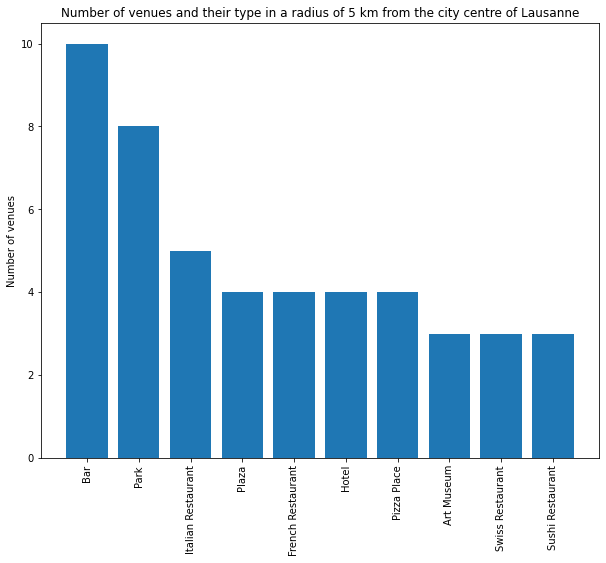

In [22]:
plt.figure(figsize = (10,8))
plt.bar(centre_laus_freq.index,centre_laus_freq)
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues and their type in a radius of 5 km from the city centre of Lausanne')

Now we run the same function for all the neighbourhoods in Lausanne

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        print(radius)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
lausanne_venues = getNearbyVenues(names=lau_data['neighbourhoods'],
                                   latitudes=lau_data['latitude'],
                                   longitudes=lau_data['longitude']
                                  )

Centre
500
Maupas/Valency
500


KeyError: 'groups'

In [ ]:
print(lausanne_venues.shape)
lausanne_venues.head()

In [ ]:
lausanne_venues.groupby('Neighbourhood').count()

In [ ]:
lausanne_venues.groupby('Neighbourhood').count().sum()

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(lausanne_venues.groupby('Neighbourhood').count().index,lausanne_venues.groupby('Neighbourhood').count()['Venue'])
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues in the different quarters of the city of Lausanne')

In [ ]:
# one hot encoding
lausanne_onehot = pd.get_dummies(lausanne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lausanne_onehot['Neighbourhood'] = lausanne_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [lausanne_onehot.columns[-1]] + list(lausanne_onehot.columns[:-1])
lausanne_onehot = lausanne_onehot[fixed_columns]

lausanne_onehot.head()

In [ ]:
#lausanne_grouped = lausanne_onehot.groupby('Neighbourhood').mean().reset_index()
lausanne_grouped = lausanne_onehot.groupby('Neighbourhood').sum().reset_index()

In [ ]:
lausanne_grouped.head()

In [ ]:
lausanne_grouped.shape

In [ ]:
num_top_venues = 5

for hood in lausanne_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = lausanne_grouped[lausanne_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Let's define a function that assembles in a dataframe the most common venues

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = lausanne_grouped['Neighbourhood']

for ind in np.arange(lausanne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lausanne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(18)

Run K mean to group quarters into clusters

In [ ]:
# set number of clusters
kclusters = 3

lausanne_grouped_clustering = lausanne_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lausanne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lausanne_merged = lau_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lausanne_merged = lausanne_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhoods')

lausanne_merged.head(18) # check the last columns!

Let's create a map to show the clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude_lau, longitude_lau], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lausanne_merged['latitude'], lausanne_merged['longitude'], lausanne_merged['neighbourhoods'], lausanne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Torino analysis

Here we get the coordinates of the city of Torino

In [ ]:
address = 'Torino, Italy'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude_to = location.latitude
longitude_to = location.longitude
print('The geograpical coordinate of Torino are {}, {}.'.format(latitude_to, longitude_to))

Here we get the list of Torino's quarters from the Wikipedia page and we clean the dataframe from unnecessary information. I decided to keep group information about the quarters at a higher level, chosing the administrative grouping called "circoscrizione" that is an ensemble of multiple quarters


In [ ]:
wiki_url = "https://it.wikipedia.org/wiki/Circoscrizioni_di_Torino"
wiki_table = pd.read_html(wiki_url)  

In [ ]:
to_data = pd.DataFrame(wiki_table[0])
to_data.head()

In [ ]:
cols = [1,2,3,4]

In [ ]:
to_data.drop(to_data.columns[cols], axis = 1, inplace = True)

In [ ]:
to_data.head()

In [ ]:
to_data['Circoscrizione'][1] = 'Circoscrizione 2'
to_data['Circoscrizione'][7] = 'Circoscrizione 8'

In [ ]:
from unicodedata import normalize
temp = pd.Series([],dtype = str)

for i in range(0, len(pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"])):
    normalize('NFKD', pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"][i])
    temp[i] = pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"][i].replace(' ab.','').replace('.','')
    
pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"] = temp.astype(float)

To get an idea of the total population and the distribution per quarter, we plot the number of inhabitants per quarter of Torino

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(to_data['Circoscrizione'],pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"] )
plt.xticks(rotation = 90)
plt.ylabel('Number of inhabitants (2011)')
plt.title('Number of inhabitants in the different quarters of the city of Torino')

The total number of inhabitants in Torino is:

In [ ]:
tot_torino = pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"].sum() 
tot_torino

Unfortunately there is not a table listing already the coordinate of the center for each quarter, so the coordinates where added by hand

In [ ]:
to_data['latitude'] = [45.070203,45.033970,45.064219,45.079942,45.102908,45.110617,45.092651,45.026379]
to_data['longitude'] = [7.676228,7.620971,7.636010,7.641316,7.649016,7.705603,7.726734,7.665784]

In [ ]:
to_data.rename(columns={'Circoscrizione':'neighbourhoods'}, inplace = True)
to_data.head()

Here we show a map of Torino and its neighbourhoods

In [ ]:
# create map of Lausanne using latitude and longitude values
map_to = folium.Map(location=[latitude_to, longitude_to], zoom_start=12)

# add markers to map
for lat, lng, label in zip(to_data['latitude'], to_data['longitude'], to_data['neighbourhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

Here we access information about venues in a radius of 7 km m around the centre of Torino

In [ ]:
radius = 7000
LIMIT = 150
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_to, longitude_to, VERSION, radius, LIMIT)
results = requests.get(url).json()

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

Here we take the results obtained about the venues, we calculate the frequency per venue type and we take the first 10 venue types

In [ ]:
centre_to_freq = nearby_venues.groupby('categories').count().sort_values('name',ascending = False).iloc[0:10,0]

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(centre_to_freq.index,centre_to_freq)
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues and their type in a radius of 7 km from the city centre of Torino')

Now we run the same function for all the neighbourhoods in Torino

In [ ]:
torino_venues = getNearbyVenues(names=to_data['neighbourhoods'],
                                   latitudes=to_data['latitude'],
                                   longitudes=to_data['longitude']
                                  )

In [ ]:
print(torino_venues.shape)
torino_venues.head()

In [ ]:
torino_venues.groupby('Neighbourhood').count()

In [ ]:
torino_venues.groupby('Neighbourhood').count().sum()

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(torino_venues.groupby('Neighbourhood').count().index,torino_venues.groupby('Neighbourhood').count()['Venue'])
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues in the different quarters of the city of Torino')

In [ ]:
# one hot encoding
torino_onehot = pd.get_dummies(torino_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torino_onehot['Neighbourhood'] = torino_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [torino_onehot.columns[-1]] + list(torino_onehot.columns[:-1])
torino_onehot = torino_onehot[fixed_columns]
torino_onehot.head()

In [ ]:
torino_grouped = torino_onehot.groupby('Neighbourhood').sum().reset_index()

In [ ]:
torino_grouped.head()

In [ ]:
torino_grouped.shape

In [ ]:
num_top_venues = 5

for hood in torino_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = torino_grouped[torino_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = torino_grouped['Neighbourhood']

for ind in np.arange(torino_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torino_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [ ]:
# set number of clusters
kclusters = 3

torino_grouped_clustering = torino_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torino_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

torino_merged = to_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
torino_merged = torino_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhoods')

torino_merged.head(8) # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude_to, longitude_to], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torino_merged['latitude'], torino_merged['longitude'], torino_merged['neighbourhoods'], torino_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters